In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data = data.sample(frac=1).reset_index(drop=True)

In [4]:
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_02_kha
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_03_ga
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_12_thaa


In [5]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_data,test_data = train_test_split(data.loc[:,'pixel_0000':'pixel_1023'],data['character'],test_size=0.2)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
train_x = sc_x.fit_transform(train_x)
test_x = sc_x.transform(test_x)

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
train_y = le.fit_transform(train_data.values)
train_y = train_y.reshape(-1,1)

test_y = le.transform(test_data)
test_y = test_y.reshape(-1,1)

ohe = OneHotEncoder(categorical_features='all')
train_y = ohe.fit_transform(train_y).toarray()
test_y = ohe.fit_transform(test_y).toarray()

# Using shallow artificial neural network for devnagari character classification

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [144]:
clf = Sequential()
clf.add(Dense(activation='relu',input_dim=1024,units=500,kernel_initializer='uniform'))
clf.add(Dense(units=46,kernel_initializer='uniform',activation='softmax'))
clf.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [146]:
clf.fit(train_x,train_y,epochs=5)

Epoch 1/2
73600/73600 [==============================] - 26s 347us/step - loss: 0.2590 - acc: 0.9360
Epoch 2/2
73600/73600 [==============================] - 27s 365us/step - loss: 0.2262 - acc: 0.9461


In [147]:
y_pred = clf.predict(test_x)
y_pred = np.argmax(y_pred,axis=1)
y_true = np.argmax(test_y,axis=1)
np.sum(np.diag(confusion_matrix(y_true,y_pred)))/184

89.967391304347828

In [148]:
print(confusion_matrix(y_true,y_pred))

[[375   0   0 ...,   1   0   0]
 [  0 384   0 ...,   0   0   0]
 [  0   3 354 ...,   0   1   0]
 ..., 
 [  0   0   0 ..., 391   0   0]
 [  0   0   0 ...,   0 411   0]
 [  0   0   0 ...,   0   0 388]]


In [150]:
f1_score(y_true,y_pred,average='weighted')

0.90116892607852328

# Using Convolutional neural networks for devnagari character classification

Since I'll be using the tensorflow backend instead of theano i'll be converting the input imges in a 4 dimensional vector - [samples,rows,cols,channels]

In [9]:
train_x1 = train_x.reshape((train_x.shape[0],32,32,1))
test_x1 = test_x.reshape((test_x.shape[0],32,32,1))

In [24]:
clf1 = Sequential()

clf1.add(Convolution2D(32,(3,3),input_shape=(32,32,1),activation='relu'))
clf1.add(MaxPooling2D(2,2))


In [25]:
# Adding one more convolution step
clf1.add(Convolution2D(64,(3,3),activation='relu'))
clf1.add(MaxPooling2D(2,2))

In [26]:
clf1.add(Flatten())

In [27]:
clf1.add(Dense(activation='relu',units=500,kernel_initializer='uniform'))
clf1.add(Dense(units=46,kernel_initializer='uniform',activation='softmax'))
clf1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
clf1.fit(train_x1,train_y,epochs=11)

Epoch 1/5
73600/73600 [==============================] - 136s 2ms/step - loss: 0.0148 - acc: 0.9954
Epoch 2/5
73600/73600 [==============================] - 136s 2ms/step - loss: 0.0136 - acc: 0.9959
Epoch 3/5
73600/73600 [==============================] - 148s 2ms/step - loss: 0.0110 - acc: 0.9968
Epoch 4/5
67520/73600 [==========================>...] - ETA: 10s - loss: 0.0117 - acc: 0.9963

KeyboardInterrupt: 

In [20]:
y_pred1 = clf1.predict(test_x1)
y_pred1 = np.argmax(y_pred1,axis=1)
y_true1 = np.argmax(test_y,axis=1)
np.sum(np.diag(confusion_matrix(y_true1,y_pred1)))/184

97.635869565217391

In [22]:
arr = confusion_matrix(y_true1,y_pred1)

In [21]:
f1_score(y_true1,y_pred1,average='weighted')

0.97639033815823184

# Results:  with a single hidden layer neural network we achieve a weighted f1 score of 0.90 and with the same architecture in convolutional neural net we achieve the weighted f1 score of 0.95 which is a significant improvement over the ANN score. Also, adding another layer of convolution step increses the score from 0.95 to 0.976

In [231]:
misclassified_indices = np.where(y_true1!=y_pred1)[0]

In [232]:
misclassified_indices.shape

(729,)

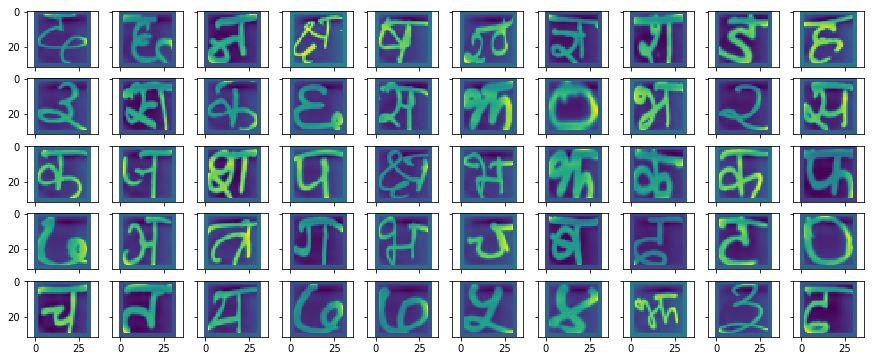

In [233]:
# Plotting misclassified images to check for any pattern
fig, axs = plt.subplots(5,10, figsize=(15, 6), facecolor='w', edgecolor='k',sharex=True,sharey=True)
# fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(50):
    axs[i].imshow(train_x1[misclassified_indices[i]].reshape((32,32)))
